### <p style="text-align: right;"> &#9989; Jacob Jensen

#### <p style="text-align: right;"> &#9989; Kyleigh Phillips, Luke Layman, John Romig, Adam Romund, Dave Yonkers

# Day 8: In-class Assignment: Modeling with ODEs

<img src="https://static.vecteezy.com/system/resources/previews/000/155/797/non_2x/vector-bungee-jumper-falling-in-fear.jpg" width= 400><p style="text-align: right;">
</p>

### Goals for Today's In-Class Assignment
By the end of this assignment, you should be able to:
* Use functions to define derivatives that model the evolution of a physical system.
* Use loops to update the state of an evolving system.
* Use `odeint` to model a physical system
* Use <code>matplotlib</code> to plot the evolution of the system.
* Use NumPy when necessary to manipulate arrays or perform mathematical operations
* Compare the differences between different numerical solutions to ODEs

### Assignment instructions

Today, **with your group**, you're going to try to apply what you've learned in the pre-class assignment to solve ODEs to model a physical system.

**This assignment is due at the end of class** and should be uploaded into the "In-class Assignments" dropbox folder for Day 8.  Submission instructions can be found at the end of the notebook.

---
# Modeling a bungee jumper

Building off of what you learned in your pre-class assignment, you're going to try modeling the motion of a bungee jumper with and without air resistance. There is a lot of detail included in this section to try to make sure you have all the information you need to evolve the system, so make sure you read through it in detail.

For those of you who might not be familiar with Bungee Jumping, here's the Wikipedia explanation:
 
 > Bungee jumping is an activity that involves jumping from a tall structure while connected to a large elastic cord. The tall structure is usually a fixed object, such as a building, bridge or crane; but it is also possible to jump from a movable object, such as a hot-air-balloon or helicopter, that has the ability to hover above the ground. The thrill comes from the free-falling and the rebound. When the person jumps, the cord stretches and the jumper flies upwards again as the cord recoils, and continues to oscillate up and down until all the kinetic energy is dissipated.
 
The first case of modern bungee jumping occurred in 1979 and this extreme sport parallels sky-diving in many ways. Given this, we're going to build off of your experience with modeling the sky-diver to model the bungee jumper. One thing to note is that while both sky-diving and bungee jumping involve someone being in freefall, the bungee jumper model is complicated by the addition of the bungee cord (which is very good for the bungee jumper!).

In the bungee jumping model, the cord itself acts as a spring, which provides the restoring force necessary for the bungee jumper to travel back upward once it reaches the bottom of the jump. This force is defined by **Hooke's Law**, which states that:

$$F = -k~s$$

where $k$ is the spring constant and $s$ is the displacement, or distance, from the spring's normal resting position. In other words:

* **The displacement, $s$, is defined to be $s = l - l_{\mathrm{unstretched}}$**, where $l_{\mathrm{unstretched}}$ is the natural length of the spring when it is neither stretched or compressed.

Using the equation for force, this means the acceleration applied by the spring is:

$$a_{\mathrm{spring}} = \frac{-k~s}{m}$$

where, in the case of the bungee jumper, this uses the mass, $m$, of the jumper themself.

For this problem, use the following values for these new constants:

* **Spring constant**, **$k = 6.0$**
* **Natural length (neither stretched or compressed) of the bungee cord/spring**, $l_{\mathrm{unstretched}} = 30.0$ m. 

**Important Note:** In reality, a bungee cord never pushes the jumper downward, but we're going to make the assumption that the bungee cord acts like a rigid spring to simplify the problem. So, in our model, when the jumper is at the top of the jump they feel a force downward due to fact that the "spring" is in a compressed state. Any time you compute an acceleration, you'll want to make sure you include the acceleration due to Hooke's Law.

**You're going to model the *length* of the bungee cord (not the height of the bungee jumper) for a total of 60 seconds and assume the bungee jumper dives head first with a projected area, $A$, of 0.1 m$^2$ and has a mass, $m$, of 80 kg**

Also, to start the problem, you should assume that **$l=0$ and that this represents the time when the bungee jumper is at their highest point (right before they jump)**.

---
For reference, here are the differential equations of motion we used for the skydiver in the pre-class assignment:

We know that the **change in height** over some **change in time** is the **velocity** of the sky-diver, which we can write as:

$$ \frac{dh}{dt} = v$$

where we can think of **dh** as some small change in the height and **dt** is some small change in time. 

Similarly, a **change in velocity** over **change in time** is the **acceleration**, which we can write as:

$$ \frac{dv}{dt} = a$$

Now, if we combine these equations with the **initial conditions** of the skydiver, we have what is often referred to as an **initial value problem**.

If we want to solve this system **numerically**, one way that we can do it is to use a set of **"update equations"**, that allow us to move the skydiver from one point in time to another. The simplest set of update equations we can use are the following:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + \frac{dh}{dt}\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + \frac{dv}{dt}\Delta t$$

and since we know that $\frac{dh}{dt} = v$ and $\frac{dv}{dt} = a$, we can also write these equations this way:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + v~\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + a~\Delta t$$

You should also remember that the acceleration at any moment in time is the sum of all of the individual accelerations, which in the case of the skydiver looked something like this:

$$a_{\mathrm{total}} = a_{\mathrm{gravity}} + a_{\mathrm{air}}$$

---
## Solving the ODEs using update equations

For your first solution, you're going to model the motion of the bungee jumper *using loops and update equations*. **Once you have a working model, you should make a plot of the bungee cord length and the velocity as a function of time**.

**Note**: When modeling the length of the bungee cord, gravity acts to extend the cord, so the acceleration due to gravity should be considered a **positive value**, which is different than the skydiver problem.

**Try modeling the solution both with an without air resistance and see how the results change.**

For the case of no air resistance, you'll get a solution that models what is referred to as a "simple harmonic oscillator". When you include air resistance, you get a "damped harmonic oscillator."

**A solution skydiver model from the pre-class assignment is included at the end of this notebook if you would like to use it as a reference or as the foundation for your new code.**

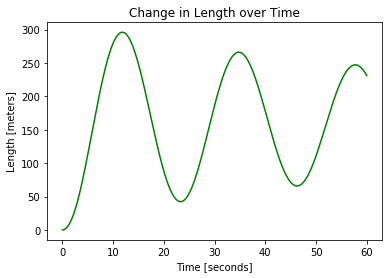

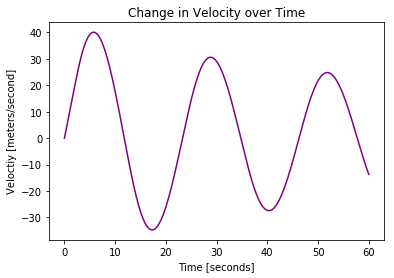

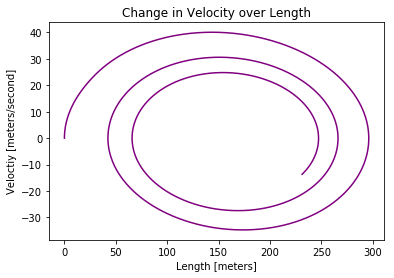

The max length the bungee cord will stretch is 296.1292 meters


In [52]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize variables
l = 0 # initial length; m
v = 0 # initial velocity; m/s 
g = 9.81 # gravity; m/s^2
t = 0 # initial time
tmax = 60 # Falling time
dt = 0.01 # timestep

# Initialize lists for storing data
length = []
velocity = []
time = []
acceleration = []

# Append initial values to lists
length.append(l)
velocity.append(v)
time.append(t)
acceleration.append(g)

# Create a function to compute derivaives of velocity and length
def derivsUpdate(l,v, g):
    
    #Needed constants
    area = 0.1 #m^2
    mass = 80 #kg
    k = 6.0 #constant
    l_un = 30 #m
    
    a_air = (-0.65 * area * v * abs(v))/mass
    #Only apply the spring acceleration if the cord has tension
    if l > 30:
        a_spr = -k * (l - l_un) / mass
    else:
        a_spr = 0
    
    #Find derivative of length
    dldt = v
    
    #Find derivative of velocity
    dvdt = g + a_air + a_spr
    
    return dldt, dvdt

# Create a time loop that will update the jumpers values
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dldt, dvdt = derivsUpdate(l,v,g)
    
    # Update Equations
    l_new = l + dldt*dt # new length
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to length and velocity lists
    length.append(l_new)
    velocity.append(v_new)
    acceleration.append(dvdt)
    
    # Update old length/velocity with new values
    l = l_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)

#PLot the velocity and length over time
plt.figure(1)
plt.plot(time, length, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Length [meters]')
plt.title('Change in Length over Time')
plt.show()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.title('Change in Velocity over Time')
plt.show()

plt.figure(3)
plt.plot(length, velocity, color = 'purple')
plt.xlabel('Length [meters]')
plt.ylabel('Veloctiy [meters/second]')
plt.title('Change in Velocity over Length')
plt.show()

print('The max length the bungee cord will stretch is {:.4f} meters'.format(np.max(length)))

**Question**: Do your results make sense? If the bungee jumper jumps from a bridge that is 200 meters above the ground, will they survive the jump?

No, as the bungee cord extends further than 200m and that would result in an unfortunate splat. 

---
## Solving the ODEs using ODEINT

For your second solution, you're going to model the motion of the bungee jumper using `odeint`. **Once you have a working model, you should make a plot of the bungee cord length and the velocity as a function of time**.

**Note**: You should be able to use what you figured out from the update equation solution to help guide your `odeint` solution.

**As before, try modeling the solution both with an without air resistance and see how the results change.**

**An `odeint` solution for skydiver model from the pre-class assignment is included at the end of this notebook if you would like to use it as a reference or as the foundation for your new code.**

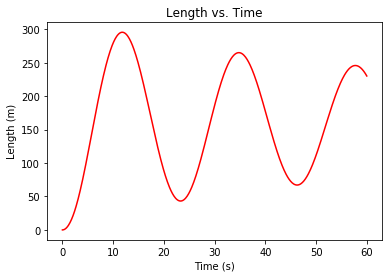

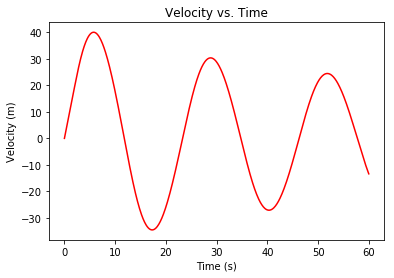

In [58]:
# Put your code here
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import odeint

#Initial parameters
l_un = 30.0 #m
l = 0
m = 80 #kg
area = 0.1 #m^2
k = 6.0 #spring constant
tmax = 60 #s
dt = 0.1 #s
v0 = 0 #m/s

#Store initial values
init = [l,v0]

#Empty lists for storing values
lengthList = []
velocityList = []

#Creation of time array
timeAr = np.arange(0,tmax + dt, dt)

def deriv(currVal, time):
    
    #Needed constants
    area = 0.1 #m^2
    g = 9.81 #m/s^2\
    mass = 80 #kg
    k = 6.0 #constant
    l_un = 30 #m
    
    #Unpack current values
    l,v = currVal
    
    a_air = (-0.65 * area * v * abs(v))/mass
    
    #Apply the force from tension only if the cord is actually stretching
    if l > 30:
        a_spr = -k * (l - l_un) / mass
    else:
        a_spr = 0
    
    #Find derivative of length
    dldt = v
    
    #Find derivative of velocity
    dvdt = g + a_air + a_spr
    
    return dldt, dvdt

sol = odeint(deriv, init, timeAr)

#Plot of length against time
plt.plot(timeAr, sol[:, 0], color = 'r')
plt.xlabel("Time (s)")
plt.ylabel("Length (m)")
plt.title("Length vs. Time")
plt.show()

#Plot of velocity against time
plt.plot(timeAr, sol[:, 1], color = 'r')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)")
plt.title("Velocity vs. Time")
plt.show()

---
## Comparing your solutions

Now that you have functional solutions using both the update equations and `odeint`, you should compare your results from the two different methods.

**In the same plot, plot the position as a function of time from both your update equation solution and your `odeint` solution. Make a separate plot for both velocity solutions as well.**

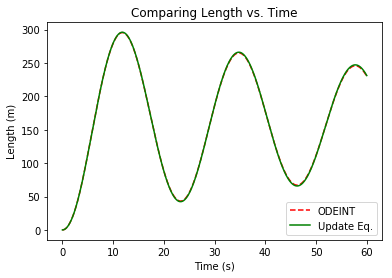

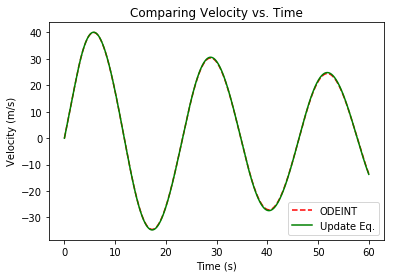

In [61]:
#Comparing lengths
plt.plot(timeAr, sol[:, 0], 'r--', label = 'ODEINT')
plt.plot(time, length, 'g-', label = 'Update Eq.')
plt.xlabel("Time (s)")
plt.ylabel("Length (m)")
plt.legend(loc = 'lower right')
plt.title('Comparing Length vs. Time')
plt.show()

#Comparing velocities
plt.plot(timeAr, sol[:, 1],'r--', label = 'ODEINT')
plt.plot(time, velocity,'g-', label = 'Update Eq.')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend(loc = 'lower right')
plt.title('Comparing Velocity vs. Time')
plt.show()

**Question**: Do the results from your two different methods agree? If they don't, how do they differ? What happens as you change the size of the timesteps? How do the solutions compare when you go to larger time steps? smaller time steps?

Both methods arrived at the same conclusion. A change in time steps results in minor shifts between the graphs, assuming different time steps are used between methods.

**Question**: Which of the two methods for modeling this system do you prefer? Which one felt like more work to get working? For the one that required more work, were there benefits to doing that work or drawbacks? Leave your responses in the cell below.

I prefer the ODEINT method as I sometimes have a tough time keeping track of variables and when they are changing. The update equations felt like a lot to get working correctly. The benefit to update equations is I can see whats going on with the variables but a drawback is that it was easy to get confused as to where I was in my code, even with comments.

---


### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the submission link for Day 8, and upload it there.

---
---
# Example solutions to the skydiver problem
---
## Solution to the skydiver problem using update equations

The following code provides a solution to the skydiver problem using update equations for the case when air resistance is included.

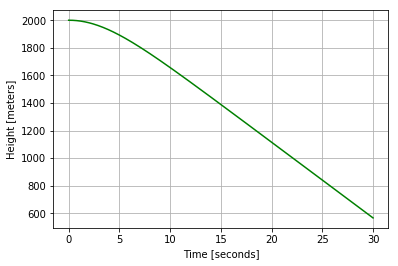

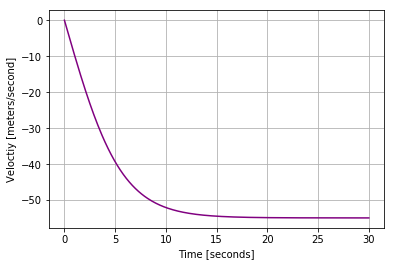

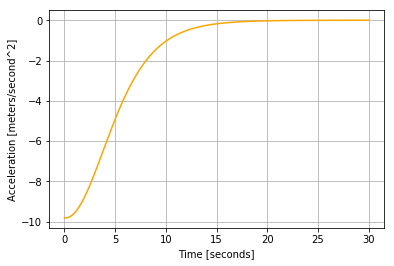

In [1]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize variables
h = 2000 # initial height; m
v = 0 # initial velocity; m/s 
g = -9.81 # gravity; m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 0.1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []
acceleration = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)
acceleration.append(g)

# Create a function to compute derivaives of velocity and height
def derivs(v,g):
    # Define some variables for the air resistance
    A = 0.4 # m^2
    m = 80.0 # kg
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is acceleration (gravity in this e.g.)
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    acceleration.append(dvdt)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity/acceleration vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

plt.figure(3)
plt.plot(time, acceleration, color = 'orange')
plt.xlabel('Time [seconds]')
plt.ylabel('Acceleration [meters/second^2]')
plt.grid()

## Solution to the skydiver problem using ODEINT

The following code provides a solution to the skydiver problem using `odeint` for the case when air resistance is included.

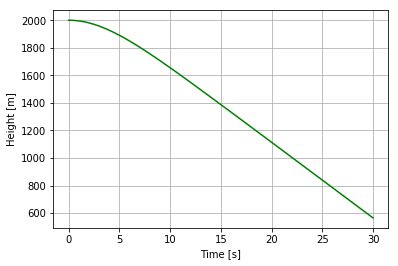

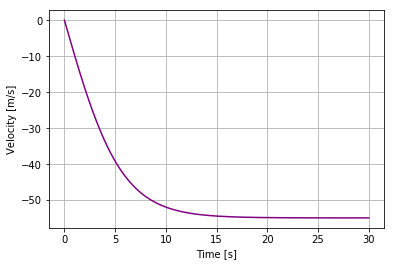

In [2]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint # This one is new to you!

# Derivative function
def derivs(curr_vals, time):
    
    # Declare parameters
    g = -9.81 # m/s^2
    A = 0.4 # m^2
    m = 80.0 # kg
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to compute the derivative
    dhdt = v
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

# Declare Variables for initial conditions
h0 = 2000 # meters
v0 = 0 # m/s
g = -9.81 # m/s^2
tmax = 30 # seconds
dt = 0.1 # seconds

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with odeint
sol = odeint(derivs, init, time)

# Plot the results using the values stored in the solution variable, "sol"

# Plot the height using the "0" element from the solution
plt.figure(1)
plt.plot(time, sol[:,0],color="green")
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

# Plot the velocity using the "1" element from the solution
plt.figure(2)
plt.plot(time, sol[:,1],color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

&#169; Copyright 2018,  Michigan State University Board of Trustees